# Домашнее задание "Функции потерь и оптимизация"
1. Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/

Взять код градиентного спуска для линейной регрессии (с занятия) и обучить ее

Методом nesterov momentum

Методом rmsprop

2. Задание со звездочкой - доработать код логистической регрессии из первого занятия и обучить ее теми же методами для задачи классификации Ирисов (взять только два цветка - Iris Versicolor и Iris Virginica)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

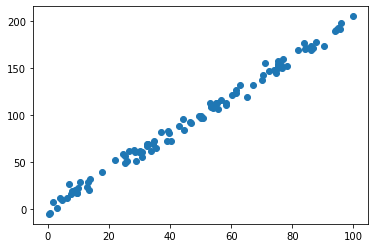

In [2]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

In [3]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) ** 2
    return total_cost / (2 * len(X))

In [4]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
    return total_cost / (len(X))    

def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost / (len(X))  

### Метод Нестерова

In [6]:
EPOCHS = 20
LEARNING_RATE = 0.0001

theta0 = np.ones((EPOCHS,))
theta1 = np.ones((EPOCHS,))

vk_0 = 1
vk_1 = 1

betta = 0.1

for k in range(1,EPOCHS-1):
    dt0 = der_theta0(X, Y, vk_0, vk_1)
    dt1 = der_theta1(X, Y, vk_0, vk_1)
    
    vk_0 = theta0[k] + betta*(theta0[k] - theta0[k-1])
    theta0[k+1] = vk_0 - LEARNING_RATE * dt0
    
    vk_1 = theta1[k] + betta*(theta1[k] - theta1[k-1])
    theta1[k+1] = vk_1 - LEARNING_RATE * dt1
    
    print(f"theta0[{k+1}]:", theta0[k+1], f"theta1[{k+1}]:", theta1[k+1], "cost:", cost_function(X, Y, theta0[k+1], theta1[k+1]), '\n')


theta0[2]: 1.0047101279586397 theta1[2]: 1.3006925319532774 cost: 745.7063093737149 

theta0[3]: 1.0098912687131434 theta1[3]: 1.6314543171018825 cost: 214.73216880873875 

theta0[4]: 1.0135639542114427 theta1[4]: 1.8657253318429141 cost: 37.79885629165399 

theta0[5]: 1.0155160962252783 theta1[5]: 1.9899450493094721 cost: 10.97688965500044 

theta0[6]: 1.0162397975480468 theta1[6]: 2.03559025222455 cost: 12.785724171263587 

theta0[7]: 1.0163082114535413 theta1[7]: 2.0393214667095503 cost: 13.210771844197176 

theta0[8]: 1.016133381772089 theta1[8]: 2.0274941647835827 cost: 12.007565082381639 

theta0[9]: 1.0159363909471613 theta1[9]: 2.0142493935488455 cost: 11.159727092364397 

theta0[10]: 1.0158001232777467 theta1[10]: 2.0048886628212794 cost: 10.878855853729247 

theta0[11]: 1.0157328830173065 theta1[11]: 1.999943135700931 cost: 10.836901863373312 

theta0[12]: 1.0157147408773575 theta1[12]: 1.9981380795933241 cost: 10.839918812029387 

theta0[13]: 1.0157226896520275 theta1[13]: 1

In [7]:
preds = theta0[EPOCHS-1] + theta1[EPOCHS-1] * X

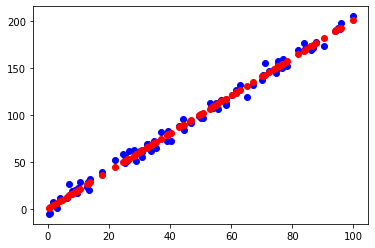

In [8]:
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds, color='red')
plt.show()

# Метод rmsprop

In [9]:
EPOCHS = 10
LEARNING_RATE = 0.25

theta0 = 1
theta1 = 1

EG_0 = 0
EG_1 = 0

gamma = 0.995
eps = 0.01

for k in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    EG_0 = gamma*EG_0 + (1-gamma)*dt0*dt0
    theta0 = theta0 - LEARNING_RATE/np.sqrt(EG_0 + eps)*dt0
        
    EG_1 = gamma*EG_1 + (1-gamma)*dt1*dt1
    theta1 = theta1 - LEARNING_RATE/np.sqrt(EG_1 + eps)*dt1
    
    print(f"theta0: {theta0}, theta1: {theta1}, cost: {cost_function(X, Y, theta0, theta1)} \n")

theta0: 4.533941344918949, theta1: 4.535533514903121, cost: 10106.430258302098 

theta0: 1.2325439155877387, theta1: 1.2360106140623448, cost: 879.8084891120241 

theta0: 2.163769784022711, theta1: 2.17191730725285, cost: 65.34432612294334 

theta0: 1.925297277433532, theta1: 1.9375989630328996, cost: 14.296400148364528 

theta0: 1.9799981470115877, theta1: 1.9965776046100643, cost: 11.091035466549304 

theta0: 1.9608542813729997, theta1: 1.9816582419574684, cost: 10.88441611515285 

theta0: 1.960562970486751, theta1: 1.9855820615462365, cost: 10.870188346258717 

theta0: 1.955427630414048, theta1: 1.9846411884314132, cost: 10.868616409712661 

theta0: 1.951580891869064, theta1: 1.984971187289178, cost: 10.867903904764448 

theta0: 1.9474161447334248, theta1: 1.984964687684052, cost: 10.867257502793262 



In [10]:
preds = theta0 + theta1 * X

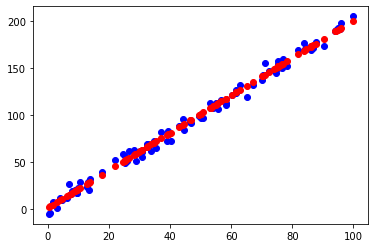

In [11]:
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds, color='red')
plt.show()

### 2. Задание со звездочкой  
доработать код логистической регрессии из первого занятия и обучить ее теми же методами для задачи классификации Ирисов (взять только два цветка - Iris Versicolor и Iris Virginica)

In [12]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [13]:
iris = load_iris()
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
data['target'] = data_class
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
# убираем сентозу
data_clean = data[data['target'] != 0]
data_clean

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
X = data_clean.iloc[:, 0:-1].to_numpy()
Y = data_clean.iloc[:, -1].to_numpy()

In [17]:
#  Cross-Entropy-функция потери, которую будем минимизировать
def Cross_Entropy_function(X, y, theta0, theta):
    total_cost = 0
    for i in range(len(X)):
        total_cost -= ((1 - y[i]) * (theta0 + np.dot(theta, X.T[:, i])) -  np.log(1 + np.exp(theta0 + np.dot(theta, X.T[:, i])))) 
    return total_cost 

In [18]:
# производная по тетта0
def der_theta0(X, y, theta0, theta):
    total_cost = 0
    for i in range(len(X)):
        total_cost -= (1 - y[i] - 1 / (1 + np.exp(theta0 + np.dot(theta, X.T[:, i]))) * np.exp(theta0 + np.dot(theta, X.T[:, i])) ) 
    return total_cost 

In [19]:
# производная по остальным тетта
def der_theta(X, y, theta0, theta, n):
    """ n - номер тетта (0, 1, 2, 3)"""
    total_cost = 0
    for i in range(len(X)):
        total_cost -= ((1 - y[i]) * X.T[n, i] - 1 / (1 + np.exp(theta0 + np.dot(theta, X.T[:, i]))) * np.exp(theta0 + np.dot(theta, X.T[:, i])) * X.T[n, i] ) 
    return total_cost 

### Метод Нестерова

In [20]:
EPOCHS = 15
LEARNING_RATE = 0.00005

theta0 = np.ones((EPOCHS,))
theta = np.ones((EPOCHS, 4))
dt = np.random.normal(size=(4,))

vk0 = 1
vk = np.ones((4,))

betta = 0.975

for k in range(1,EPOCHS-1):
    dt0 = der_theta0(X, Y, vk0, vk)    
    vk0 = theta0[k] + betta*(theta0[k] - theta0[k-1])
    theta0[k+1] = vk0 - LEARNING_RATE * dt0
    
    for i in range(0,4):
        dt[i] = der_theta(X, Y, vk0, vk, n=i)
        vk[i] = theta[k][i] + betta*(theta[k][i] - theta[k-1][i])
        theta[k+1][i] = vk[i] - LEARNING_RATE * dt[i]
    
    print(f'theta0[{k+1}]: {theta0[k+1]}, theta[{k+1}]: {theta[k+1]}, Cross_Entropy: {Cross_Entropy_function(X, Y, theta0[k+1], theta[k+1])}\n')


theta0[2]: 0.9925000014490444, theta[2]: [0.95222001 0.978205   0.96159001 0.986555  ], Cross_Entropy: 2489.194129661246

theta0[3]: 0.977687504310907, theta[3]: [0.85785452 0.93515989 0.88573027 0.96000113], Cross_Entropy: 2312.617523543695

theta0[4]: 0.9557453233436612, theta[4]: [0.7180682  0.87139592 0.77335707 0.92066613], Cross_Entropy: 2051.0497774333203

theta0[5]: 0.926851712427749, theta[5]: [0.53399662 0.78743117 0.62538341 0.86886962], Cross_Entropy: 1706.6182060298527

theta0[6]: 0.8911805465256323, theta[6]: [0.30674743 0.68377154 0.44270117 0.80492446], Cross_Entropy: 1281.4277254777405

theta0[7]: 0.8489023371988726, theta[7]: [0.03740652 0.56092385 0.22621049 0.72916205], Cross_Entropy: 778.2208652895878

theta0[8]: 0.8002039631012147, theta[8]: [-0.27283845  0.41976213 -0.02228623  0.64283202], Cross_Entropy: 223.5224104208114

theta0[9]: 0.7459306502620978, theta[9]: [-0.61851039  0.26889605 -0.28578657  0.55275566], Cross_Entropy: -143.56445683077214

theta0[10]: 0

In [21]:
Cross_Entropy_function(X, Y, 0.8, np.array([-0.27, 0.49, -0.02, 0.64]))

253.25276722664512

# Метод rmsprop

In [22]:
EPOCHS = 15
LEARNING_RATE = 0.012

theta0 = 1
theta = np.ones((4,))

EG_0 = 0
EG = np.zeros((4,))

gamma = 0.995
eps = 0.01

dt = np.random.normal(size=(4,))

for k in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta)
    EG_0 = gamma*EG_0 + (1-gamma)*dt0*dt0
    theta0 = theta0 - LEARNING_RATE/np.sqrt(EG_0 + eps)*dt0
      
    for i in range(0,4):
        dt[i] = der_theta(X, Y, theta0, theta, n=i)
        EG[i] = gamma*EG[i] + (1-gamma)*dt[i]*dt[i]
        theta[i] = theta[i] - LEARNING_RATE/np.sqrt(EG[i] + eps)*dt[i]
    
    print(f'theta0: {theta0}, theta: {theta}, Cross_Entropy: {Cross_Entropy_function(X, Y, theta0, theta)}\n')

theta0: 0.8303019144876812, theta: [0.83029456 0.83029527 0.83029466 0.83029672], Cross_Entropy: 2140.99992716937

theta0: 0.7101544207226984, theta: [0.71014445 0.71014551 0.71014472 0.71014761], Cross_Entropy: 1831.1831962813621

theta0: 0.6119315017423341, theta: [0.61192008 0.61192174 0.61192099 0.61192471], Cross_Entropy: 1577.9085792118203

theta0: 0.5267634313199488, theta: [0.52675099 0.52675438 0.52675403 0.52675947], Cross_Entropy: 1358.312933116554

theta0: 0.45049819112174044, theta: [0.4504848  0.45049322 0.45049424 0.45050414], Cross_Entropy: 1161.7162426940044

theta0: 0.3808099677717991, theta: [0.38079537 0.38081753 0.38082244 0.38084417], Cross_Entropy: 982.1897285055478

theta0: 0.31626104264947286, theta: [0.31624457 0.31630199 0.31631717 0.31636922], Cross_Entropy: 816.1929224028294

theta0: 0.2559309870244399, theta: [0.25591166 0.25605453 0.25609546 0.25622149], Cross_Entropy: 661.7363987246674

theta0: 0.19927540146629683, theta: [0.1992527  0.19959099 0.1996926

In [23]:
model = LogisticRegression()

In [24]:
model.fit( X, Y )

LogisticRegression()

In [25]:
model.coef_

array([[-0.39443136, -0.51327025,  2.93075043,  2.4170433 ]])

In [26]:
model.intercept_

array([-14.43080433])

In [ ]:
# Вывод: коэффициенты логистической регрессии отличаются во всех методах